# Regression Exercise 

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

 It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.
 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

** Import the cal_housing_clean.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [2]:
import pandas as pd

In [3]:
cal_housing=pd.read_csv("cal_housing_clean.csv")

In [4]:
cal_housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
cal_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
x=cal_housing.drop('medianHouseValue',axis=1)
y=cal_housing['medianHouseValue']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.7)

C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
x.shape

(20640, 6)

In [10]:
x_train.shape

(14447, 6)

### Scale the Feature Data

** Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
x_train_df=pd.DataFrame(data=scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test_df=pd.DataFrame(data=scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

### Create Feature Columns

** Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

In [14]:
import tensorflow as tf  

In [15]:
x.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [16]:
housingMedianAge=tf.feature_column.numeric_column("housingMedianAge")
totalRooms=tf.feature_column.numeric_column("totalRooms")
totalBedrooms=tf.feature_column.numeric_column("totalBedrooms")
population=tf.feature_column.numeric_column("population")
households=tf.feature_column.numeric_column("households")
medianIncome=tf.feature_column.numeric_column("medianIncome")

In [17]:
feat_cols=[housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome]

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [18]:
input_function=tf.estimator.inputs.pandas_input_fn(x=x_train_df,y=y_train,shuffle=True,batch_size=100,num_epochs=2000)

In [19]:
input_function_eval=tf.estimator.inputs.pandas_input_fn(x=x_test_df,shuffle=False,batch_size=10,num_epochs=1)

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [42]:
model=tf.estimator.DNNRegressor(hidden_units=[60,60,60,30,30],feature_columns=feat_cols,model_dir="model_California_Housing_Regression")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_master': '', '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025A5EFD80F0>, '_tf_random_seed': None, '_task_id': 0, '_session_config': None, '_is_chief': True, '_evaluation_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_num_ps_replicas': 0, '_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_device_fn': None, '_model_dir': 'model_California_Housing_Regression', '_service': None, '_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_save_summary_steps': 100}


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [ ]:
model.train(input_fn=input_function,steps=90000)

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [44]:
y_pred=[]
for i in list(model.predict(input_fn=input_function_eval)):
    y_pred.append(i["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_California_Housing_Regression\model.ckpt-90000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [45]:
import sklearn

In [46]:
print(sklearn.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)**0.5)

64775.7055259


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  413.,  1086.,  1247.,  1073.,   784.,   510.,   382.,   196.,
          135.,   367.]),
 array([  22500. ,   70250.1,  118000.2,  165750.3,  213500.4,  261250.5,
         309000.6,  356750.7,  404500.8,  452250.9,  500001. ]),
 <a list of 10 Patch objects>)

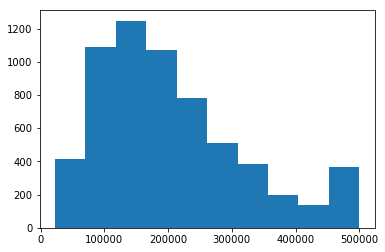

In [48]:
plt.hist(y_test,bins=10)


In [49]:
import numpy as np 

(array([  203.,  1616.,  1832.,  1051.,   648.,   377.,   196.,   205.,
           60.,     5.]),
 array([  32130.66992188,   88704.55917969,  145278.4484375 ,
         201852.33769531,  258426.22695313,  315000.11621094,
         371574.00546875,  428147.89472656,  484721.78398438,
         541295.67324219,  597869.5625    ]),
 <a list of 10 Patch objects>)

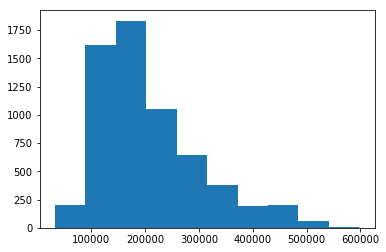

In [52]:
pred_list=[]
for i in y_pred:
    pred_list.append(i[0])
plt.hist(pred_list,bins=10)